In [20]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

Goal: Figure out the distribution and tons of facts about the 466 datasets. 

In [21]:
# first start off with something easy. What are the demensions of the dataset?
# aka how many features (columns in x), how many samples (rows in x)
dataset_info = pd.DataFrame(columns=['dataset_num', 'num_features', 'num_samples', 'num_classes','type_of_data','class_distribution'])

In [22]:
# now we need to load in the datasets
label_files = np.array([])
x_files = np.array([])
for i in range(1, 467):
	if i == 147 or i == 157 or i == 387:
		continue
	path = '../d2v/466datasets/dataset_'+ str(i)
	for f in listdir(path):
		if isfile(join(path, f)):
			if f.endswith('_labels_py.dat'):
				label_files = np.append(label_files, f)
			else:
				x_files = np.append(x_files, f)

### figure out the number of classes each dataset has 
(spoiler they are all binary)

In [5]:
# loop through all the files ending in labels_py.dat and grab the number of classes and add it to the datset 
for i in range(0, len(label_files)):
	# grab the dataset number
	dataset_num = int(label_files[i].split('_')[1])
	# grab the number of classes
	num_classes = len(np.unique(pd.read_csv('../d2v/466datasets/dataset_'+str(dataset_num)+'/dataset_'+str(dataset_num)+'_labels_py.dat', header=None).values))
	# add the dataset number and number of classes to the dataset
	pd.concat([dataset_info, pd.DataFrame({'dataset_num':dataset_num, 'num_classes':num_classes}, index=[0])], ignore_index=True)

In [6]:
# they are all 2 classes, all binary classification 
#dataset_info['num_classes'].value_counts()
# 2    463

In [7]:
# So i guess this column isnt really necessary anymore, so I can just drop it. 
dataset_info = dataset_info.drop('num_classes', axis=1)

In [8]:
# TODO: add the class distribtion to the dataset (should be pretty easy becuase everything is binary )

### figure out the distribution of the number of features (cols in x) and samples (rows in x )

In [23]:
# loop through all the files ending in num_py.dat and grab the number of features and add it to the dataset
num_samples = np.array([])
for i in range(0, len(x_files)):
	# grab the dataset number
	dataset_num = int(x_files[i].split('_')[1])
	# grab the number of features
	num_features = pd.read_csv('../d2v/466datasets/dataset_'+str(dataset_num)+'/dataset_'+str(dataset_num)+'_py.dat', header=None).values.shape[1]
	# get the number of samples
	num_sample = pd.read_csv('../d2v/466datasets/dataset_'+str(dataset_num)+'/dataset_'+str(dataset_num)+'_py.dat', header=None).values.shape[0]
	num_samples = np.append(num_samples, num_sample)
	# add the dataset number and number of features to the dataset
	# want to concatenate with the associated dataset number
	dataset_info = pd.concat([dataset_info, pd.DataFrame({'dataset_num':dataset_num, 'num_features':num_features}, index=[0])], ignore_index=True)
	# add num_samples to the dataset

dataset_info['num_samples'] = num_samples


In [13]:
dataset_info.head()

,dataset_num,num_features,num_samples,num_classes,type_of_data,class_distribution
0,1,10,40768.0,NaN,NaN,NaN
1,2,10,4177.0,NaN,NaN,NaN
2,3,40,13750.0,NaN,NaN,NaN
3,4,13,50.0,NaN,NaN,NaN
4,5,11,475.0,NaN,NaN,NaN


#### Look at Num_features

In [24]:
dataset_info['num_features'] = dataset_info['num_features'].astype(int)

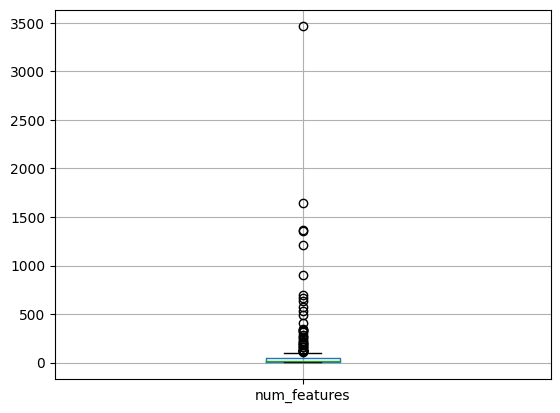

In [25]:
# make a boxplot from num_features
import matplotlib.pyplot as plt
boxplot = dataset_info.boxplot(column='num_features')
plt.show()

In [26]:
# what is that max value?
# dataset_info[dataset_info['num_features'] == dataset_info['num_features'].max()]
# weird I think it only has 60 features, maybe im accidently counting the num_samples????
# nope it is accuratly counting the number of columns in the dataset

# curious about how the arff files are turned into the py.dat files
# becuase for for dataset 428, it has signficantly more features than the arff file. In fact it looks like it is all 0s
# guessing it might be becuase of the sklearn converstion of categorical data to one hot encoding
dataset_info.sort_values(by=['num_features'], ascending=False).head(20)

,dataset_num,num_features,num_samples,num_classes,type_of_data,class_distribution
424,428,3465,3190.0,NaN,NaN,NaN
330,333,1648,2000.0,NaN,NaN,NaN
33,34,1361,1340.0,NaN,NaN,NaN
148,150,1357,1302.0,NaN,NaN,NaN
147,149,1209,1161.0,NaN,NaN,NaN
181,184,899,540.0,NaN,NaN,NaN
308,311,694,7019.0,NaN,NaN,NaN
312,315,660,600.0,NaN,NaN,NaN
423,427,635,531.0,NaN,NaN,NaN
307,310,576,10108.0,NaN,NaN,NaN


In [ ]:
dataset_info.sort_values(by=['num_features'], ascending=True).head(10)

,dataset_num,num_features,num_samples,type_of_data,class_distribution
392,396,2,NaN,NaN,NaN
121,122,2,NaN,NaN,NaN
122,123,2,NaN,NaN,NaN
27,28,2,NaN,NaN,NaN
92,93,2,NaN,NaN,NaN
388,392,2,NaN,NaN,NaN
132,133,2,NaN,NaN,NaN
140,141,2,NaN,NaN,NaN
91,92,2,NaN,NaN,NaN
441,445,2,NaN,NaN,NaN


#### Look at num_samples 

In [14]:
dataset_info['num_samples'] = dataset_info['num_samples'].astype(int)

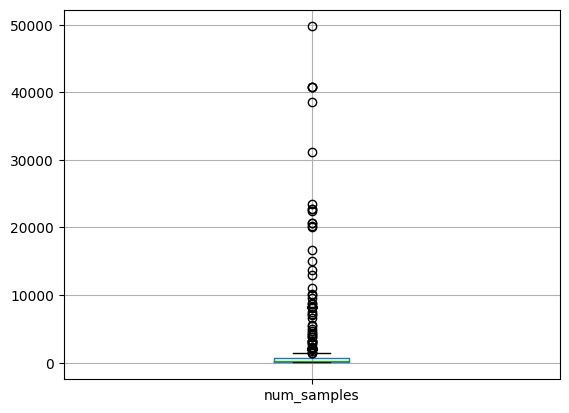

In [15]:
# make a boxplot from num_samples
boxplot = dataset_info.boxplot(column='num_samples')
plt.show()

In [16]:
dataset_info.sort_values(by=['num_samples'], ascending=False).head(20)

,dataset_num,num_features,num_samples,num_classes,type_of_data,class_distribution
167,170,9,49772,NaN,NaN,NaN
0,1,10,40768,NaN,NaN,NaN
338,341,14,40768,NaN,NaN,NaN
201,204,10,40768,NaN,NaN,NaN
166,169,9,38586,NaN,NaN,NaN
169,172,9,31164,NaN,NaN,NaN
168,171,9,23455,NaN,NaN,NaN
294,297,8,22784,NaN,NaN,NaN
293,296,16,22784,NaN,NaN,NaN
164,167,10,22432,NaN,NaN,NaN


In [ ]:
dataset_info.sort_values(by=['num_samples'], ascending=True).head(10)

,dataset_num,num_features,num_samples,num_classes,type_of_data,class_distribution
49,50,16,31,NaN,NaN,NaN
20,21,35,31,NaN,NaN,NaN
109,110,4,32,NaN,NaN,NaN
107,108,5,32,NaN,NaN,NaN
122,123,2,32,NaN,NaN,NaN
27,28,2,32,NaN,NaN,NaN
320,323,160,32,NaN,NaN,NaN
95,96,2,32,NaN,NaN,NaN
115,116,4,32,NaN,NaN,NaN
92,93,2,32,NaN,NaN,NaN
